In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('mobiles.csv')

In [4]:
df = data[['Brand','Title','Model Name','Color','Browse Type','Touchscreen','Display_size_inches','Resolution','Operating System','Processor Type','Processor Core','Internal Storage','Primary Camera','Secondary Camera Available','Network Type','Wi-Fi','NFC','Battery Capacity','Other Features','Price']]

In [5]:
df.head()

,Brand,Title,Model Name,Color,Browse Type,Touchscreen,Display_size_inches,Resolution,Operating System,Processor Type,Processor Core,Internal Storage,Primary Camera,Secondary Camera Available,Network Type,Wi-Fi,NFC,Battery Capacity,Other Features,Price
0,APPLE,"APPLE iPhone 13 (Pink, 128 GB)",iPhone 13,Pink,Smartphones,Yes,6.10,2532 x 1170 Pixels,iOS 15,A15 Bionic Chip,Hexa Core,128 GB,12MP + 12MP,Yes,"5G, 4G, 3G, 2G",Yes,Yes,3240 mAh,"Splash, Water and Dust Resistant IP68 Rated (M...",52499
1,POCO,"POCO C51 (Power Black, 64 GB)",C51,Power Black,Smartphones,Yes,6.52,1600 x 720 Pixels,Android 13,Helio G36,Octa Core,64 GB,8MP Dual Rear Camera,Yes,"2G, 3G, 4G, 4G VOLTE",Yes,No,5000 mAh,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...",6499
2,OnePlus,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)",Nord CE 2 Lite 5G,Black Dusk,Smartphones,Yes,6.59,2412 x 1080 Pixels,Android 13,NaN,Octa Core,128 GB,64MP Rear Camera,NaN,5G,NaN,NaN,5000 mAh,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...",17196
3,realme,"realme 11x 5G (Purple Dawn, 128 GB)",11x 5G,Purple Dawn,Smartphones,Yes,6.72,2400 x 1080 Pixels,Android 13,Dimensity 6100+,Octa Core,128 GB,64MP + 2MP,Yes,"5G, 4G VOLTE, 4G, 3G, 2G",Yes,No,5000 mAh,"COG Sealing Process, In-Cell Touch Panel Techn...",15999
4,realme,"realme 11x 5G (Midnight Black, 128 GB)",11x 5G,Midnight Black,Smartphones,Yes,6.72,2400 x 1080 Pixels,Android 13,Dimensity 6100+,Octa Core,128 GB,64MP + 2MP,Yes,"5G, 4G VOLTE, 4G, 3G, 2G",Yes,No,5000 mAh,"COG Sealing Process, In-Cell Touch Panel Techn...",14999


## Null Values Treatment

In [6]:
df.isna().sum()

Brand                           0
Title                           0
Model Name                      0
Color                           0
Browse Type                     0
Touchscreen                     3
Display_size_inches             0
Resolution                      1
Operating System              166
Processor Type                348
Processor Core                262
Internal Storage               11
Primary Camera                 29
Secondary Camera Available    292
Network Type                    5
Wi-Fi                         384
NFC                           468
Battery Capacity                0
Other Features                345
Price                           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand                       984 non-null    object 
 1   Title                       984 non-null    object 
 2   Model Name                  984 non-null    object 
 3   Color                       984 non-null    object 
 4   Browse Type                 984 non-null    object 
 5   Touchscreen                 981 non-null    object 
 6   Display_size_inches         984 non-null    float64
 7   Resolution                  983 non-null    object 
 8   Operating System            818 non-null    object 
 9   Processor Type              636 non-null    object 
 10  Processor Core              722 non-null    object 
 11  Internal Storage            973 non-null    object 
 12  Primary Camera              955 non-null    object 
 13  Secondary Camera Available  692 non

In [8]:
df['Touchscreen'].fillna(df['Touchscreen'].mode()[0],inplace=True)
df['Resolution'].fillna(df['Resolution'].mode()[0],inplace=True)
df['Operating System'].fillna(df['Operating System'].mode()[0],inplace=True)
df['Processor Type'].fillna(df['Processor Type'].mode()[0],inplace=True)
df['Processor Core'].fillna(df['Processor Core'].mode()[0],inplace=True)
df['Internal Storage'].fillna(df['Internal Storage'].mode()[0],inplace=True)
df['Primary Camera'].fillna(df['Primary Camera'].mode()[0],inplace=True)
df['Secondary Camera Available'].fillna(df['Secondary Camera Available'].mode()[0],inplace=True)
df['Network Type'].fillna(df['Network Type'].mode()[0],inplace=True)
df['Wi-Fi'].fillna(df['Wi-Fi'].mode()[0],inplace=True)
df['Other Features'].fillna(df['Other Features'].mode()[0],inplace=True)


In [9]:
df.isna().sum()

Brand                           0
Title                           0
Model Name                      0
Color                           0
Browse Type                     0
Touchscreen                     0
Display_size_inches             0
Resolution                      0
Operating System                0
Processor Type                  0
Processor Core                  0
Internal Storage                0
Primary Camera                  0
Secondary Camera Available      0
Network Type                    0
Wi-Fi                           0
NFC                           468
Battery Capacity                0
Other Features                  0
Price                           0
dtype: int64

In [10]:
df.drop(['NFC'],axis=1,inplace=True)

In [11]:
df.drop_duplicates(inplace=True)

## Data Preprocessing

In [12]:
df.head(2)

,Brand,Title,Model Name,Color,Browse Type,Touchscreen,Display_size_inches,Resolution,Operating System,Processor Type,Processor Core,Internal Storage,Primary Camera,Secondary Camera Available,Network Type,Wi-Fi,Battery Capacity,Other Features,Price
0,APPLE,"APPLE iPhone 13 (Pink, 128 GB)",iPhone 13,Pink,Smartphones,Yes,6.10,2532 x 1170 Pixels,iOS 15,A15 Bionic Chip,Hexa Core,128 GB,12MP + 12MP,Yes,"5G, 4G, 3G, 2G",Yes,3240 mAh,"Splash, Water and Dust Resistant IP68 Rated (M...",52499
1,POCO,"POCO C51 (Power Black, 64 GB)",C51,Power Black,Smartphones,Yes,6.52,1600 x 720 Pixels,Android 13,Helio G36,Octa Core,64 GB,8MP Dual Rear Camera,Yes,"2G, 3G, 4G, 4G VOLTE",Yes,5000 mAh,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...",6499


### Column "Brand"

<Axes: xlabel='Brand'>

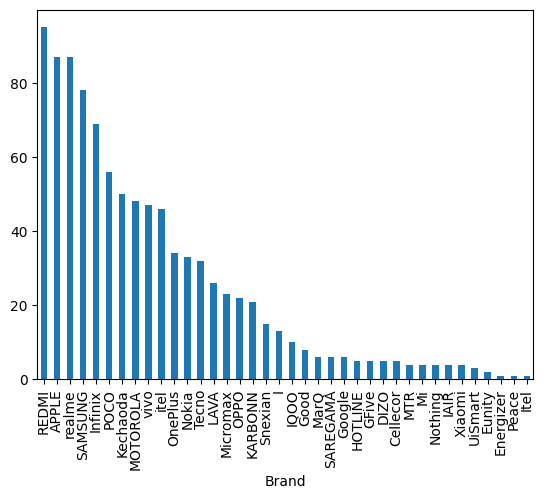

In [13]:
df['Brand'].value_counts().plot(kind='bar')

In [14]:
df['Brand'].value_counts()

Brand
REDMI        95
APPLE        87
realme       87
SAMSUNG      78
Infinix      69
POCO         56
Kechaoda     50
MOTOROLA     48
vivo         47
itel         46
OnePlus      34
Nokia        33
Tecno        32
LAVA         26
Micromax     23
OPPO         22
KARBONN      21
Snexian      15
I            13
IQOO         10
Good          8
MarQ          6
SAREGAMA      6
Google        6
HOTLINE       5
GFive         5
DIZO          5
Cellecor      5
MTR           4
Mi            4
Nothing       4
IAIR          4
Xiaomi        4
UiSmart       3
Eunity        2
Energizer     1
Peace         1
Itel          1
Name: count, dtype: int64

In [15]:
df = df[~df['Brand'].isin(['I','Good','MarQ','SAREGAMA','GFive','DIZO','Cellecor','MTR','Mi','IAIR','Xiaomi','UiSmart','Energizer','Peace','Itel'])]

In [16]:
df.head()

,Brand,Title,Model Name,Color,Browse Type,Touchscreen,Display_size_inches,Resolution,Operating System,Processor Type,Processor Core,Internal Storage,Primary Camera,Secondary Camera Available,Network Type,Wi-Fi,Battery Capacity,Other Features,Price
0,APPLE,"APPLE iPhone 13 (Pink, 128 GB)",iPhone 13,Pink,Smartphones,Yes,6.10,2532 x 1170 Pixels,iOS 15,A15 Bionic Chip,Hexa Core,128 GB,12MP + 12MP,Yes,"5G, 4G, 3G, 2G",Yes,3240 mAh,"Splash, Water and Dust Resistant IP68 Rated (M...",52499
1,POCO,"POCO C51 (Power Black, 64 GB)",C51,Power Black,Smartphones,Yes,6.52,1600 x 720 Pixels,Android 13,Helio G36,Octa Core,64 GB,8MP Dual Rear Camera,Yes,"2G, 3G, 4G, 4G VOLTE",Yes,5000 mAh,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...",6499
2,OnePlus,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)",Nord CE 2 Lite 5G,Black Dusk,Smartphones,Yes,6.59,2412 x 1080 Pixels,Android 13,"A15 Bionic Chip, 6 Core Processor",Octa Core,128 GB,64MP Rear Camera,Yes,5G,Yes,5000 mAh,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...",17196
3,realme,"realme 11x 5G (Purple Dawn, 128 GB)",11x 5G,Purple Dawn,Smartphones,Yes,6.72,2400 x 1080 Pixels,Android 13,Dimensity 6100+,Octa Core,128 GB,64MP + 2MP,Yes,"5G, 4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,"COG Sealing Process, In-Cell Touch Panel Techn...",15999
4,realme,"realme 11x 5G (Midnight Black, 128 GB)",11x 5G,Midnight Black,Smartphones,Yes,6.72,2400 x 1080 Pixels,Android 13,Dimensity 6100+,Octa Core,128 GB,64MP + 2MP,Yes,"5G, 4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,"COG Sealing Process, In-Cell Touch Panel Techn...",14999


### Columns "Title"

In [17]:
df['Title'].value_counts()

Title
Kechaoda K115                                                             10
SAMSUNG Guru Music 2                                                       6
Kechaoda K28                                                               6
Kechaoda K66 The Music House 4                                             5
Kechaoda A27                                                               5
                                                                          ..
REDMI A2+ (Classic Black, 64 GB)                                           1
Infinix GT10 Pro (Mirage Silver, 256 GB)                                   1
realme Narzo N55 (Prime Blue, 64 GB)                                       1
APPLE iPhone 12 (Red, 64 GB)                                               1
Tecno Camon 19 Pro Multi-Colour Changing Back-Panel (Mondrian, 128 GB)     1
Name: count, Length: 690, dtype: int64

#### Here we can see that the values is the combination of brand and MOdel Name so we can remove it

In [18]:
df.drop(columns=['Title'],inplace=True)

### Columns "Model Name"

In [19]:
df['Model Name'].value_counts()

Model Name
C55                                                              13
iPhone 12                                                        13
Note 12 Pro 5G                                                   13
12C                                                              12
iPhone 13                                                        11
                                                                 ..
Vision2S                                                          1
106 4G Keypad Mobile, Long-Lasting Battery, MicroSD Card Slot     1
Zero Ultra                                                        1
105 ss                                                            1
Camon 19 Pro Multi-Colour Changing Back-Panel                     1
Name: count, Length: 289, dtype: int64

In [20]:
df['Model Name'].unique()

array(['iPhone 13', 'C51', 'Nord CE 2 Lite 5G', '11x 5G', 'C55', 'T2x 5G',
       'g84 5G', 'Nord CE 3 Lite 5G', '12', 'SMART 7', 'g13', 'HOT 30i',
       'g73 5G', 'C53', 'V29e 5G', '11 Pro+ 5G', 'M6 Pro 5G', 'A2', 'g14',
       'e13', 'Edge 40',
       '105 Single SIM, Keypad Mobile Phone with Wireless FM Radio',
       'Galaxy F13', 'e32', 'Note 30 5G', 'g54 5G', 'Reno10 5G',
       'iPhone 14', '12 5G', 'Iphone 15', '11 Pro 5G', 'iPhone 11',
       'Guru Music 2', 'Smart 7 HD', 'Galaxy M14 5G', 'M5', 'X512',
       'X5 Pro 5G', 'G32', 'M4 Pro', 'HOT 30 5G', 'Note 12 Pro 5G',
       'X5 5G', 'F21 Pro', 'Nord CE3 5G', 'A78 5G', '10 Pro 5G', '11R 5G',
       'Edge 30 Ultra', 'A1 Josh with BOL', 'C50', 'Pixel 6a', '11 5G',
       '11 Prime', 'Galaxy M04', 'Guru 1200', 'T2 5G', '12C', 'M4 5G',
       'Galaxy F14 5G', 'A1+', 'Iphone 15 Plus', 'Iphone 15 Pro Max',
       'GURU MUSIC 2', 'A60S', 'Galaxy F23 5G', 'A3 VIBE', 'Note 12',
       'K66 The Music House 4', 'iPhone 12', 'A17', 'Zer

In [21]:
df.drop(columns=['Model Name'],inplace=True)

In [22]:
df.head(3)

,Brand,Color,Browse Type,Touchscreen,Display_size_inches,Resolution,Operating System,Processor Type,Processor Core,Internal Storage,Primary Camera,Secondary Camera Available,Network Type,Wi-Fi,Battery Capacity,Other Features,Price
0,APPLE,Pink,Smartphones,Yes,6.10,2532 x 1170 Pixels,iOS 15,A15 Bionic Chip,Hexa Core,128 GB,12MP + 12MP,Yes,"5G, 4G, 3G, 2G",Yes,3240 mAh,"Splash, Water and Dust Resistant IP68 Rated (M...",52499
1,POCO,Power Black,Smartphones,Yes,6.52,1600 x 720 Pixels,Android 13,Helio G36,Octa Core,64 GB,8MP Dual Rear Camera,Yes,"2G, 3G, 4G, 4G VOLTE",Yes,5000 mAh,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...",6499
2,OnePlus,Black Dusk,Smartphones,Yes,6.59,2412 x 1080 Pixels,Android 13,"A15 Bionic Chip, 6 Core Processor",Octa Core,128 GB,64MP Rear Camera,Yes,5G,Yes,5000 mAh,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...",17196


### Columns Color

In [23]:
df['Color'].value_counts()

Color
Black            56
Blue             38
Yellow           14
Green            14
Power Black      14
                 ..
City Blue         1
Elegant Black     1
Sapphire Blue     1
Champagne         1
Mondrian          1
Name: count, Length: 355, dtype: int64

In [24]:
def color(text):
    if text=='Black':
        return "Black"
    if text=='Blue':
        return "Blue"
    else:
        return "Any Color"

In [25]:
df['Color'] = df['Color'].apply(color)

In [26]:
df['Color'].unique()

array(['Any Color', 'Blue', 'Black'], dtype=object)

### Columns TouchScreen

In [27]:
df['Touchscreen'].value_counts()

Touchscreen
Yes    686
No     210
Name: count, dtype: int64

In [28]:
df['Touchscreen']  = df['Touchscreen'].apply(lambda x: 1 if x=="Yes" else 0)

In [29]:
df.head(3)

,Brand,Color,Browse Type,Touchscreen,Display_size_inches,Resolution,Operating System,Processor Type,Processor Core,Internal Storage,Primary Camera,Secondary Camera Available,Network Type,Wi-Fi,Battery Capacity,Other Features,Price
0,APPLE,Any Color,Smartphones,1,6.10,2532 x 1170 Pixels,iOS 15,A15 Bionic Chip,Hexa Core,128 GB,12MP + 12MP,Yes,"5G, 4G, 3G, 2G",Yes,3240 mAh,"Splash, Water and Dust Resistant IP68 Rated (M...",52499
1,POCO,Any Color,Smartphones,1,6.52,1600 x 720 Pixels,Android 13,Helio G36,Octa Core,64 GB,8MP Dual Rear Camera,Yes,"2G, 3G, 4G, 4G VOLTE",Yes,5000 mAh,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...",6499
2,OnePlus,Any Color,Smartphones,1,6.59,2412 x 1080 Pixels,Android 13,"A15 Bionic Chip, 6 Core Processor",Octa Core,128 GB,64MP Rear Camera,Yes,5G,Yes,5000 mAh,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...",17196


### Columns size Inches

In [30]:
df['Display_size_inches'].info()

<class 'pandas.core.series.Series'>
Index: 896 entries, 0 to 983
Series name: Display_size_inches
Non-Null Count  Dtype  
--------------  -----  
896 non-null    float64
dtypes: float64(1)
memory usage: 14.0 KB


In [31]:
df['Display_size_inches'].unique()

array([ 6.1  ,  6.52 ,  6.59 ,  6.72 ,  6.71 ,  6.58 ,  6.55 ,  6.79 ,
        6.6  ,  6.5  ,  6.74 ,  6.78 ,  6.7  ,  1.77 ,  2.   ,  6.67 ,
        6.43 ,  6.56 ,  6.14 ,  1.5  ,  6.38 ,  1.44 ,  1.8  ,  0.66 ,
        2.8  ,  2.6  ,  6.4  ,  6.82 ,  2.4  , 16.51 ,  6.517,  6.64 ,
        3.5  ,  4.7  ,  6.51 ,  6.68 ,  6.8  ,  6.44 ,  1.7  ,  6.9  ,
        1.4  ,  6.62 ,  6.53 ,  6.402,  6.2  ])

### Columns Resolution

In [32]:
df['Resolution'].unique()

array(['2532 x 1170 Pixels', '1600 x 720 Pixels', '2412 x 1080 Pixels',
       '2400 x 1080 Pixels', '1650 x 720 Pixels', '2408 x 1080 Pixels',
       '2400x1080', '2460 x 1080 Pixels', '1612 x 720 Pixels',
       '1600 x 720 Pixel', '2160x1080$$Pixels', '2400 x 1080 Pixel',
       '160 x 128 Pixels', '2160x1080', '2460x1080$$Pixels',
       '2556 x 1179 Pixels', '1792 x 828 Pixels', '2400x1080 Pixels',
       '128 x 160 Pixels', '1080 x 2408', '240 x 320$$',
       '128 x 160$$Pixels', '1080x2460$$Pixels', '240 x 320$$Pixels',
       '2400 x 1080$$Pixel', '1080x2412', '2772x1240 Pixels', '2772x1240',
       '160 x 128Pixels', '2400 x 1080 PIxels', '240x320$$Pixels',
       '720 x 1600', '128*128', '1650X720$$ Pixels', '2796 x 1290 Pixels',
       '1080 x 2408 Pixels', '128x160$$Pixels', '1080 x 2408$$Pixels',
       '1612 x 720$$Pixels', '128 x 160Pixels', '320 x 480$$Pixels',
       '240 x 320$$ Pixels', '1650x720$$Pixels', '2340X1080',
       '320 x 240 Pixels', '2778 x 1284 Pixels'

In [33]:
df['Resolution'].value_counts()

Resolution
2400 x 1080 Pixels    150
1600 x 720 Pixels      45
1612 x 720 Pixels      38
2532 x 1170 Pixels     37
2408 x 1080 Pixels     36
                     ... 
2640 x 1080 Pixels      1
320 X 480               1
2400 × 1080             1
3216 x 1440 Pixels      1
1080 x 2460 Pixels      1
Name: count, Length: 161, dtype: int64

### Brand Type

In [34]:
df['Browse Type'].value_counts()

Browse Type
Smartphones       683
Feature Phones    213
Name: count, dtype: int64

In [35]:
df['SmartPhone'] = df['Browse Type'].apply(lambda x: 1 if x=='Smartphones' else 0)

In [36]:
df.drop(columns=['Browse Type'],inplace=True)

In [37]:
df.head(2)

,Brand,Color,Touchscreen,Display_size_inches,Resolution,Operating System,Processor Type,Processor Core,Internal Storage,Primary Camera,Secondary Camera Available,Network Type,Wi-Fi,Battery Capacity,Other Features,Price,SmartPhone
0,APPLE,Any Color,1,6.10,2532 x 1170 Pixels,iOS 15,A15 Bionic Chip,Hexa Core,128 GB,12MP + 12MP,Yes,"5G, 4G, 3G, 2G",Yes,3240 mAh,"Splash, Water and Dust Resistant IP68 Rated (M...",52499,1
1,POCO,Any Color,1,6.52,1600 x 720 Pixels,Android 13,Helio G36,Octa Core,64 GB,8MP Dual Rear Camera,Yes,"2G, 3G, 4G, 4G VOLTE",Yes,5000 mAh,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...",6499,1


<Axes: xlabel='SmartPhone', ylabel='Price'>

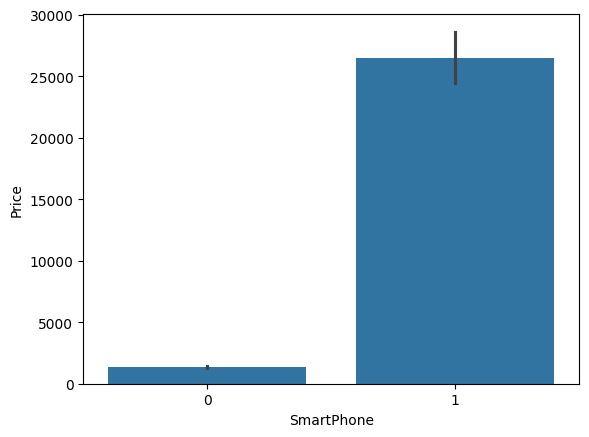

In [38]:
sns.barplot(x=df['SmartPhone'],y=df['Price'])

### Resolution

In [39]:
df['Resolution'].value_counts()

Resolution
2400 x 1080 Pixels    150
1600 x 720 Pixels      45
1612 x 720 Pixels      38
2532 x 1170 Pixels     37
2408 x 1080 Pixels     36
                     ... 
2640 x 1080 Pixels      1
320 X 480               1
2400 × 1080             1
3216 x 1440 Pixels      1
1080 x 2460 Pixels      1
Name: count, Length: 161, dtype: int64

In [40]:
df['Res']=df['Resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x)

In [41]:
df['X_res'] = df['Res'].apply(lambda x:x[0] if x else None)

In [42]:
df['Y_res'] = df['Res'].apply(lambda x:x[1] if x else None)

In [43]:
df.drop(columns=['Resolution'],inplace=True)

In [44]:
df.drop(columns=['Res'],inplace=True)

In [45]:
df.isna().sum()

Brand                         0
Color                         0
Touchscreen                   0
Display_size_inches           0
Operating System              0
Processor Type                0
Processor Core                0
Internal Storage              0
Primary Camera                0
Secondary Camera Available    0
Network Type                  0
Wi-Fi                         0
Battery Capacity              0
Other Features                0
Price                         0
SmartPhone                    0
X_res                         1
Y_res                         1
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 896 entries, 0 to 983
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand                       896 non-null    object 
 1   Color                       896 non-null    object 
 2   Touchscreen                 896 non-null    int64  
 3   Display_size_inches         896 non-null    float64
 4   Operating System            896 non-null    object 
 5   Processor Type              896 non-null    object 
 6   Processor Core              896 non-null    object 
 7   Internal Storage            896 non-null    object 
 8   Primary Camera              896 non-null    object 
 9   Secondary Camera Available  896 non-null    object 
 10  Network Type                896 non-null    object 
 11  Wi-Fi                       896 non-null    object 
 12  Battery Capacity            896 non-null    object 
 13  Other Features              896 non-null

In [47]:
df['X_res'].fillna(df['X_res'].mode()[0],inplace=True)
df['Y_res'].fillna(df['Y_res'].mode()[0],inplace=True)

In [48]:
df['X_res'] = df['X_res'].astype(int)
df['Y_res'] = df['Y_res'].astype(int)

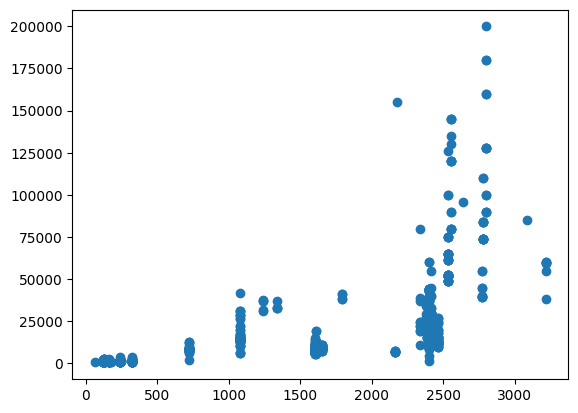

In [49]:
plt.scatter(df['X_res'],df['Price'])

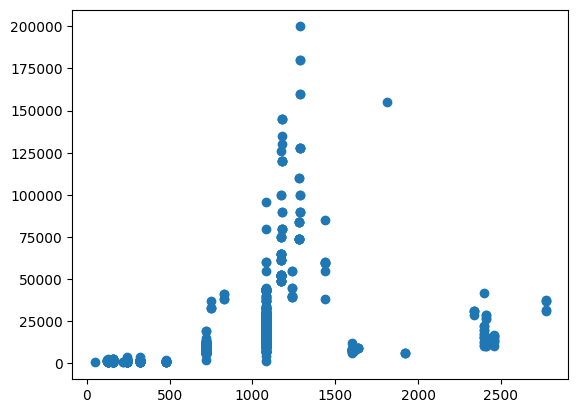

In [50]:
plt.scatter(df['Y_res'],df['Price'])

### Operating System

In [51]:
df['Operating System'].unique()

array(['iOS 15', 'Android 13', 'Android 12', 'Android Android 13',
       'Android 13 (Go Edition)', 'iOS 16',
       'Android Android 13 With MIUI 14',
       'Android MIUI 14 With Android 13', 'iOS 17', 'iOS 14.2', '1',
       'Android 10', 'Android Android 13.0', 'Android 11', 'Android Q 13',
       'Android Q Android 11', 'Android Oxygen Android 13.1',
       'Android Oxygen OxygenOS based on Android 13', 'Android 12 Go',
       'Symbian', 'Android Q 12', '0', 'iOS 14',
       'Android Q MIUI 13, Android 12.0', 'Android MIUI 13, Android 12.0',
       'Android OxygenOS based on Android 13', 'Android Android12',
       'Android Android 13 OxygenOS', 'Android Q Android 12', 'Belle',
       'Android 13 Go', 'RTOS', 'Android', 'Android Android 12',
       'Series 30+', 'Android Android13', 'Android ANdroid 13 OxygenOS',
       'Android ?MIUI 13, Android 12.0', 'Android Oxygen Android 13',
       'Android Android 12.0', 'Android Q', 'Nucleus', 'Android Q 13.0',
       'Android Q 10', 'An

In [52]:
def os(text):
    if "Android" in text and "12" in text:
        return "Android 12"
    if "Android" in text and "13" in text:
        return "Android 13"
    if "iOS" in text:
        return "Ios"
    else:
        return "Android"

In [53]:
df['Operating System'] = df['Operating System'].apply(os)

In [54]:
df['Operating System'].value_counts()

Operating System
Android 12    387
Android 13    305
Android       110
Ios            94
Name: count, dtype: int64

<Axes: xlabel='Operating System', ylabel='Price'>

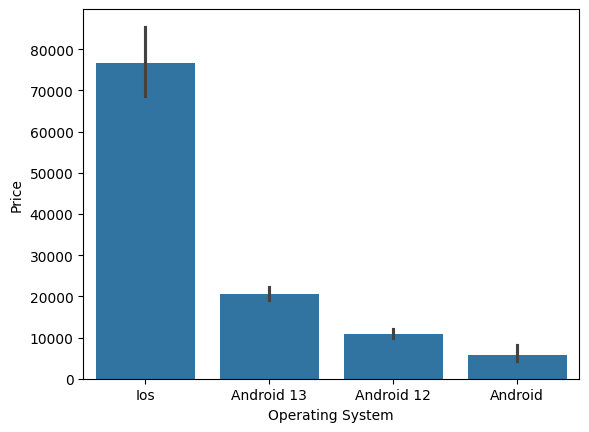

In [55]:
sns.barplot(x=df['Operating System'],y=df['Price'])

In [56]:
df.head(3)

,Brand,Color,Touchscreen,Display_size_inches,Operating System,Processor Type,Processor Core,Internal Storage,Primary Camera,Secondary Camera Available,Network Type,Wi-Fi,Battery Capacity,Other Features,Price,SmartPhone,X_res,Y_res
0,APPLE,Any Color,1,6.10,Ios,A15 Bionic Chip,Hexa Core,128 GB,12MP + 12MP,Yes,"5G, 4G, 3G, 2G",Yes,3240 mAh,"Splash, Water and Dust Resistant IP68 Rated (M...",52499,1,2532,1170
1,POCO,Any Color,1,6.52,Android 13,Helio G36,Octa Core,64 GB,8MP Dual Rear Camera,Yes,"2G, 3G, 4G, 4G VOLTE",Yes,5000 mAh,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...",6499,1,1600,720
2,OnePlus,Any Color,1,6.59,Android 13,"A15 Bionic Chip, 6 Core Processor",Octa Core,128 GB,64MP Rear Camera,Yes,5G,Yes,5000 mAh,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...",17196,1,2412,1080


### Processor Type

In [57]:
df['Processor Type'].unique()

array(['A15 Bionic Chip', 'Helio G36',
       'A15 Bionic Chip, 6 Core Processor', 'Dimensity 6100+',
       'Mediatek Helio G85', 'Dimensity 6020', 'Snapdragon 695',
       'Helio G88', 'Unisoc Spreadtrum SC9863A1', 'Helio G85', 'G37',
       'Mediatek Dimensity 930', 'T612', 'Dimensity 7050',
       'Snapdragon 4 Gen 2', 'T616', 'Unisoc T606', 'Dimensity 8020',
       'SC6531E', 'Exynos 850', 'Mediatek Helio G37', 'Dimensity 6080',
       'Dimensity 7020', 'A16 Bionic Chip, 6 Core Processor',
       'A13 Bionic Chip', 'NA 0 Single Core 208MHz',
       'Spreadtrum \nSC9863A1', 'Mediatek Helio G99',
       'Qualcomm Snapdragon 778G', 'Qualcomm Snapdragon 680',
       'Mediatek Helio G96', 'Dimensity 6020 5G',
       'Mediatek Dimensity 1080', 'Qualcomm Snapdragon 695', '6833',
       'Qualcomm Snapdragon 695 5G', 'Qualcomm Snapdragon 8+ Gen 1',
       'Mediatek Helio A22 Processor, Upto 2.0 GHz', 'Google Tensor',
       'Helio G99', 'Spreadtrum SC9863A1', 'MediaTek Helio P35',
       '

In [58]:
def processortype(text):
    if 'Bionic Chip' in text:
        return 'Bionic Chip'
    if 'Snapdragon' in text:
        return "Snapdragon"
    if 'Dimensity' in text:
        return "Dimensity"
    if 'Helio' in text:
        return "Helio"
    if 'Exynos' in text:
        return "Exynos"
    else:
        return "Qualcomm"

In [59]:
df['Processor'] = df['Processor Type'].apply(processortype)

In [60]:
df['Processor'].value_counts()

Processor
Bionic Chip    376
Dimensity      129
Qualcomm       128
Snapdragon     117
Helio          115
Exynos          31
Name: count, dtype: int64

<Axes: xlabel='Processor', ylabel='Price'>

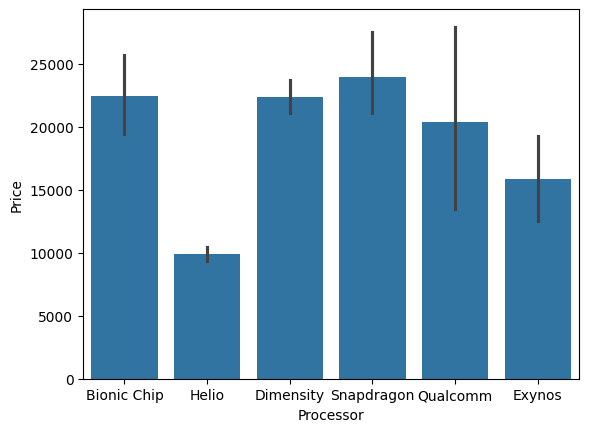

In [61]:
sns.barplot(x=df['Processor'],y=df['Price'])

In [62]:
df.drop(columns=['Processor Type'],inplace=True)

In [63]:
df.head(2)

,Brand,Color,Touchscreen,Display_size_inches,Operating System,Processor Core,Internal Storage,Primary Camera,Secondary Camera Available,Network Type,Wi-Fi,Battery Capacity,Other Features,Price,SmartPhone,X_res,Y_res,Processor
0,APPLE,Any Color,1,6.10,Ios,Hexa Core,128 GB,12MP + 12MP,Yes,"5G, 4G, 3G, 2G",Yes,3240 mAh,"Splash, Water and Dust Resistant IP68 Rated (M...",52499,1,2532,1170,Bionic Chip
1,POCO,Any Color,1,6.52,Android 13,Octa Core,64 GB,8MP Dual Rear Camera,Yes,"2G, 3G, 4G, 4G VOLTE",Yes,5000 mAh,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...",6499,1,1600,720,Helio


### Processor Core

In [64]:
df['Processor Core'].unique()

array(['Hexa Core', 'Octa Core', 'Single Core', 'Quad Core', 'Dual Core'],
      dtype=object)

In [65]:
def cores(text):
    if text == 'Hexa Core':
        return 6
    if text == 'Octa Core':
        return 8
    if text == 'Single Core':
        return 1
    if text == 'Quad Core':
        return 4
    if text == 'Dual Core':
        return 2


In [66]:
df['Processor Core'] = df['Processor Core'].apply(cores)
df['Processor Core'] = df['Processor Core'].astype(int)

In [67]:
df.head(2)

,Brand,Color,Touchscreen,Display_size_inches,Operating System,Processor Core,Internal Storage,Primary Camera,Secondary Camera Available,Network Type,Wi-Fi,Battery Capacity,Other Features,Price,SmartPhone,X_res,Y_res,Processor
0,APPLE,Any Color,1,6.10,Ios,6,128 GB,12MP + 12MP,Yes,"5G, 4G, 3G, 2G",Yes,3240 mAh,"Splash, Water and Dust Resistant IP68 Rated (M...",52499,1,2532,1170,Bionic Chip
1,POCO,Any Color,1,6.52,Android 13,8,64 GB,8MP Dual Rear Camera,Yes,"2G, 3G, 4G, 4G VOLTE",Yes,5000 mAh,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...",6499,1,1600,720,Helio


### Internal Storage

In [68]:
df['Internal Storage'].unique()

array(['128 GB', '64 GB', '256 GB', '32 MB', '32 GB', '24 MB', '4 MB',
       '153 MB', '0 GB', '64 MB', '0.125 GB', '128 MB', '16 MB', '32 KB',
       '32+3 GB', '1 TB', '3 MB', '512 GB', '0 MB', '8 MB', '10 MB',
       '20 MB', '56 MB', '6 GB', 'NA KB', '256 MB', '8 GB'], dtype=object)

In [69]:
df['Internal Storage'] = df['Internal Storage'].str.replace(' ','')

In [70]:
def ins(text):
    if "+3GB" in text:
        return text.replace('+3GB','')
    if "GB" in text:
        return text.replace('GB','')
    if 'TB' in text:
        return text.replace('TB','000')
    if "MB" in text:
         return None
    if "KB" in text:
        return None

In [71]:
df['Internal Storage']  = df['Internal Storage'].apply(ins)

In [72]:
df['Internal Storage'].value_counts()

Internal Storage
128      351
64       151
256      146
32        34
512        7
6          3
0          2
1000       2
0.125      1
8          1
Name: count, dtype: int64

In [73]:
df.dropna(inplace=True)

In [74]:
df['Internal Storage'] = df['Internal Storage'].astype(float)

In [75]:
df.head(2)

,Brand,Color,Touchscreen,Display_size_inches,Operating System,Processor Core,Internal Storage,Primary Camera,Secondary Camera Available,Network Type,Wi-Fi,Battery Capacity,Other Features,Price,SmartPhone,X_res,Y_res,Processor
0,APPLE,Any Color,1,6.10,Ios,6,128.0,12MP + 12MP,Yes,"5G, 4G, 3G, 2G",Yes,3240 mAh,"Splash, Water and Dust Resistant IP68 Rated (M...",52499,1,2532,1170,Bionic Chip
1,POCO,Any Color,1,6.52,Android 13,8,64.0,8MP Dual Rear Camera,Yes,"2G, 3G, 4G, 4G VOLTE",Yes,5000 mAh,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...",6499,1,1600,720,Helio


### Primary Camera

In [76]:
df['Primary Camera'].unique()

array(['12MP + 12MP', '8MP Dual Rear Camera', '64MP Rear Camera',
       '64MP + 2MP', '50MP Dual Rear Camera', '50MP + 2MP',
       '50MP (OIS) + 8MP', '108MP Rear Camera', '50MP + 8MP + 2MP',
       '13MP + AI Lens', '50MP + 2MP + 2MP', '50MP + AI Lens',
       '50MP + 8MP', '108MP + 2MP', '64MP + 8MP',
       '200MP (OIS) + 8MP + 2MP', '8MP Rear Camera', '13MP Rear Camera',
       '50MP + 13MP', '50MP + 5MP + 2MP', '108 MP + 2 MP+ AI Lens',
       '64MP + 32MP + 8MP', '50MP Rear Camera', '48MP + 12MP',
       '100MP (OIS) + 2MP', '0.3MP Rear Camera', '8MP + AI Lens',
       '50MP + 2MP Depth Sensor + 2MP Macro Sensor', '108MP + 8MP + 2MP',
       '64MP + 8MP + 2MP', '50 MP + AI Lens', '50MP (OIS) + 8MP + 2MP',
       '48MP + 8MP + 2MP', '200MP + 50MP + 12MP', '8MP Dual Camera',
       '12.2MP + 12MP', '13MP + 2MP', '64 MP (OIS) + 2MP',
       '48MP + 12MP + 12MP', '0MP', '50MP + 0.3MP + 0.3MP',
       '50MP + 2MP Depth + AI Lens', '50MP + 13MP + 2MP',
       '200MP + 8MP + 2MP', '1.

In [77]:
df['primary_camera']=df['Primary Camera'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x)

In [78]:
df['primary_camera'].value_counts()

primary_camera
[50]                 286
[64]                  61
[]                    52
[108]                 52
[13]                  52
[12, 12]              50
[48]                  26
[48, 12, 12]          18
[200]                 12
[48, 12]              11
[100]                  9
[12]                   7
[50, 50]               7
[50, 13]               7
[0.3]                  6
[12, 12, 12]           5
[64, 13]               4
[50, 0.3, 0.3]         3
[108, 13]              3
[0.3, 0.3]             2
[50, 12]               2
[16]                   2
[50, 64]               2
[64, 12]               2
[50, 32]               2
[50, 0.08]             2
[12.2, 12]             2
[200, 50, 12]          2
[64, 32]               2
[200, 13]              1
[50, 10, 12]           1
[13, 13]               1
[1.3]                  1
[108, 12, 10, 10]      1
[50, 12, 10]           1
[64, 50]               1
Name: count, dtype: int64

In [79]:
df['Primary Camera'] = df['primary_camera'].apply(lambda x: x[0] if x else None)

In [80]:
df['Primary Camera'] = df['Primary Camera'].apply(lambda x: float(x) if x else None)

In [81]:

df['Primary Camera'].fillna(df['Primary Camera'].median(),inplace=True)

In [82]:
df.drop(columns=['primary_camera'],inplace=True)

<Axes: xlabel='Primary Camera', ylabel='Price'>

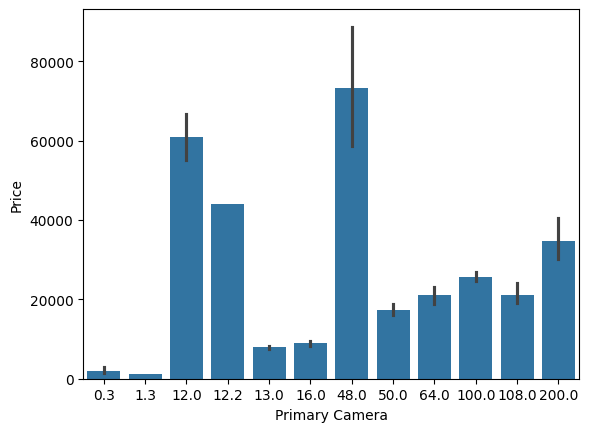

In [83]:
sns.barplot(x=df['Primary Camera'],y=df['Price'])

### Secondary Camera Avalable

In [84]:
df['Secondary Camera Available'].unique()

array(['Yes', 'No'], dtype=object)

In [85]:
df['Secondary Camera Available'] = df['Secondary Camera Available'].apply(lambda x: 1 if x=='Yes' else 0)

<Axes: xlabel='Secondary Camera Available', ylabel='Price'>

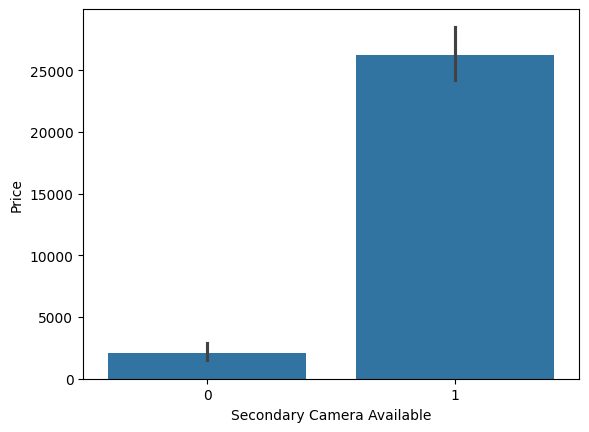

In [86]:
sns.barplot(x=df['Secondary Camera Available'],y=df['Price'])

### Network Type

In [87]:
df['Network Type'].unique()

array(['5G, 4G, 3G, 2G', '2G, 3G, 4G, 4G VOLTE', '5G',
       '5G, 4G VOLTE, 4G, 3G, 2G', '4G VOLTE, 4G, 3G, 2G', '5G, 4G, 3G',
       '2G, 3G, 4G, 5G', '4G, 3G, 2G', '2G, 3G, 4G',
       '2G, 3G, 4G, 4G VOLTE, 5G', '4G VOLTE', '2G', '5G, 4G', '4G',
       '4G VOLTE, 4G', '5G, 4G VOLTE', '5G, 4G VOLTE, 4G', '4G, 3G',
       '2G, 3G, 4G VOLTE, 5G', '4G VOLTE, 4G, 3G', '4G, 4G VOLTE, 3G, 2G'],
      dtype=object)

In [88]:
df['5G'] = df['Network Type'].apply(lambda x: 1 if '5G' in x else 0)

In [89]:
df.drop(columns=['Network Type'],inplace=True)

<Axes: xlabel='5G', ylabel='Price'>

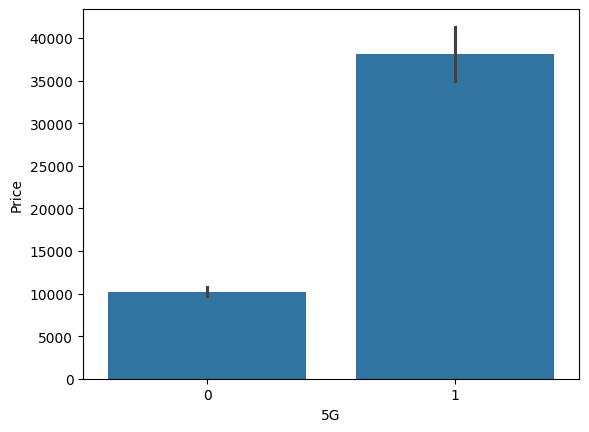

In [90]:
sns.barplot(x=df['5G'],y=df['Price'])

### Wifi

In [91]:
df['Wi-Fi'].unique()

array(['Yes', 'No'], dtype=object)

In [92]:
df['Wi-Fi'] = df['Wi-Fi'].apply(lambda x: 1 if x=='Yes' else 0)

### Battery Capacity

In [93]:
df['Battery Capacity'] = df['Battery Capacity'].str.replace('mAh','')

In [94]:
df['Battery Capacity'] = df['Battery Capacity'].astype(int)

<Axes: xlabel='Battery Capacity', ylabel='Price'>

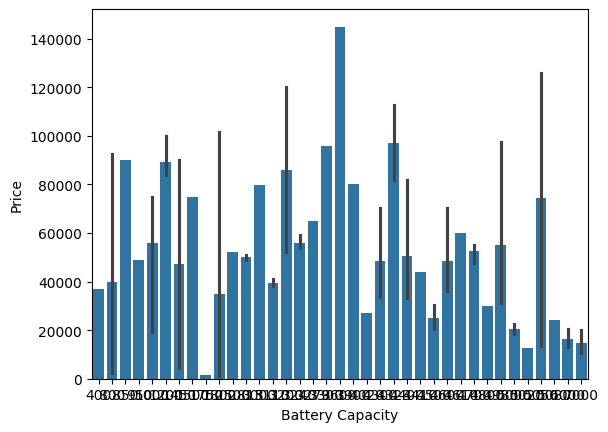

In [95]:
sns.barplot(x=df['Battery Capacity'],y=df['Price'])

### Other Features

In [96]:
df['Other Features'].unique()

array(['Splash, Water and Dust Resistant IP68 Rated (Maximum Depth of 6 metres up to 30 minutes) under IEC Standard 60529, Face ID Enabled by TrueDepth Camera for Facial Recognition, Compatible with MagSafe Accessories and Wireless Chargers',
       'Splash Resistant Coating, MIUI Dialer, Upto 3 GB Turbo RAM',
       'COG Sealing Process, In-Cell Touch Panel Technology, 10 Touch Points, Oleophpbic Coating, UFS 2.2, Maximum Charging Power: 33W, Reverse Charging, Reverse Charging Power: 5 V/1.2 A, SISO Wireless Antenna Technology, 4 x 4 MIMO RF Antenna Technology, Bluetooth Audio Codec: SBC, AAC, APTX, APTX HD, LDAC, Side Fingerprint Sensor, Wet Fingerprint Unlock, Face Unlock Technology, File Encryption, Private Space, Private Apps, Private Protection, OTG Storage Format: Upto 256 GB (Supported Formats: FAT32, EXFAT, NTFS), Dual Microphone, Dual Mic Nosie Cancellation, Flashlight Mode, L1 Level WideVine Supported, Web Video Play Supported, Press to Answer Calls, Wake Up Voice Assistant,

In [97]:
df.drop(columns=['Other Features'],inplace=True)

### Price

In [98]:
df.head()

,Brand,Color,Touchscreen,Display_size_inches,Operating System,Processor Core,Internal Storage,Primary Camera,Secondary Camera Available,Wi-Fi,Battery Capacity,Price,SmartPhone,X_res,Y_res,Processor,5G
0,APPLE,Any Color,1,6.10,Ios,6,128.0,12.0,1,1,3240,52499,1,2532,1170,Bionic Chip,1
1,POCO,Any Color,1,6.52,Android 13,8,64.0,50.0,1,1,5000,6499,1,1600,720,Helio,0
2,OnePlus,Any Color,1,6.59,Android 13,8,128.0,64.0,1,1,5000,17196,1,2412,1080,Bionic Chip,1
3,realme,Any Color,1,6.72,Android 13,8,128.0,64.0,1,1,5000,15999,1,2400,1080,Dimensity,1
4,realme,Any Color,1,6.72,Android 13,8,128.0,64.0,1,1,5000,14999,1,2400,1080,Dimensity,1


In [99]:
df['price'] = df['Price'].astype(int)

In [100]:
df.drop(columns=['Price'],inplace=True)

# EDA Perform

<Axes: xlabel='price', ylabel='Density'>

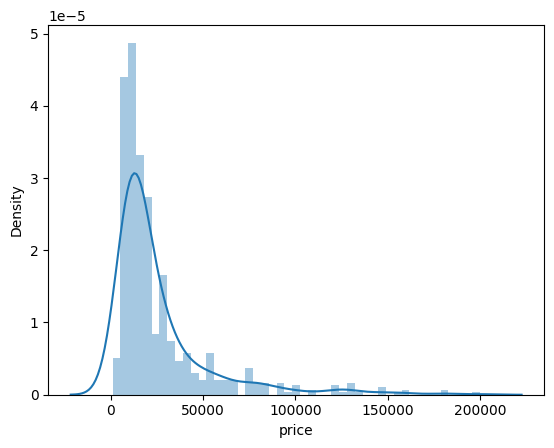

In [101]:
sns.distplot(df['price'])

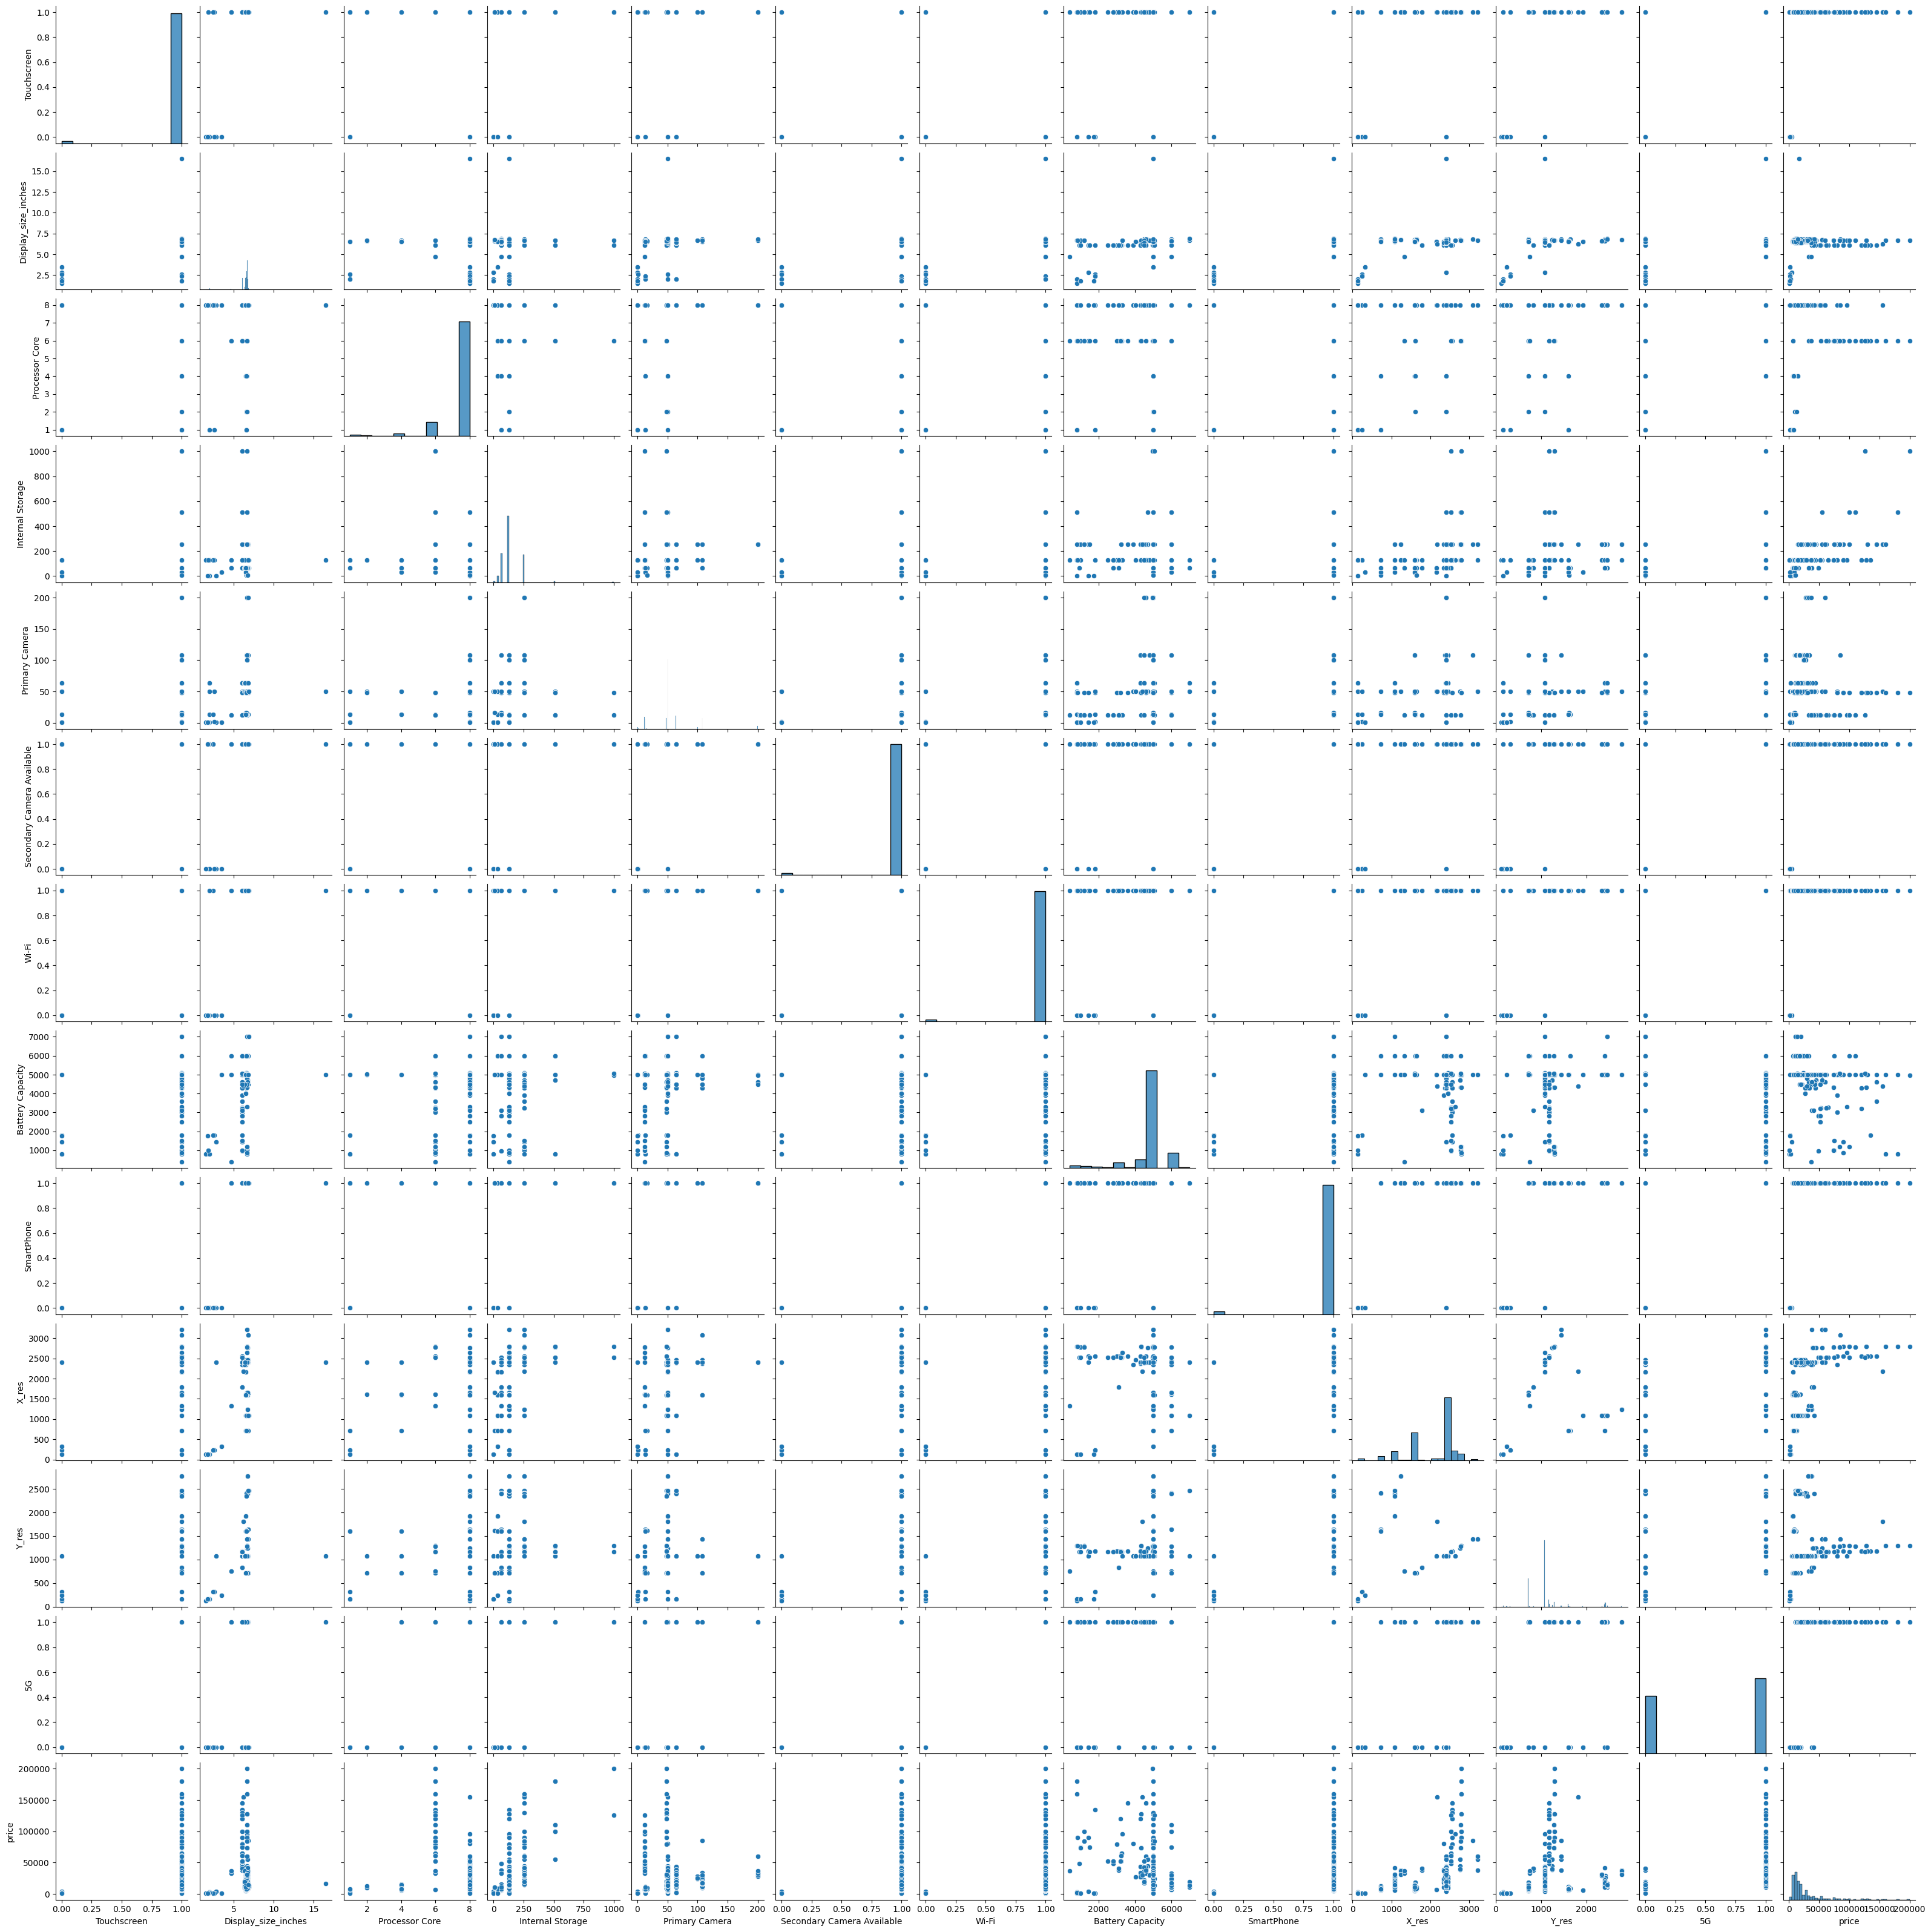

In [102]:
sns.pairplot(df)

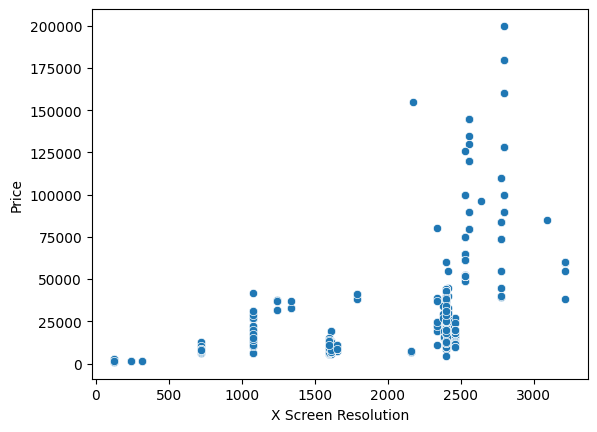

In [145]:
sns.scatterplot(x=df['X_res'],y=df['price'])
plt.xlabel("X Screen Resolution")
plt.ylabel("Price")
plt.show()

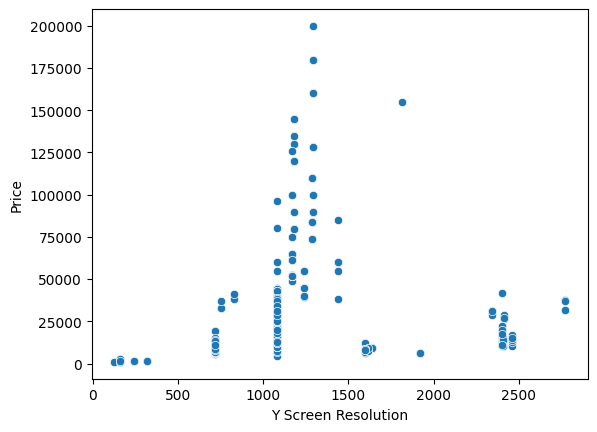

In [146]:
sns.scatterplot(x=df['Y_res'],y=df['price'])
plt.xlabel("Y Screen Resolution")
plt.ylabel("Price")
plt.show()

In [103]:
numeric_columns = df.select_dtypes(include='number')

<Axes: >

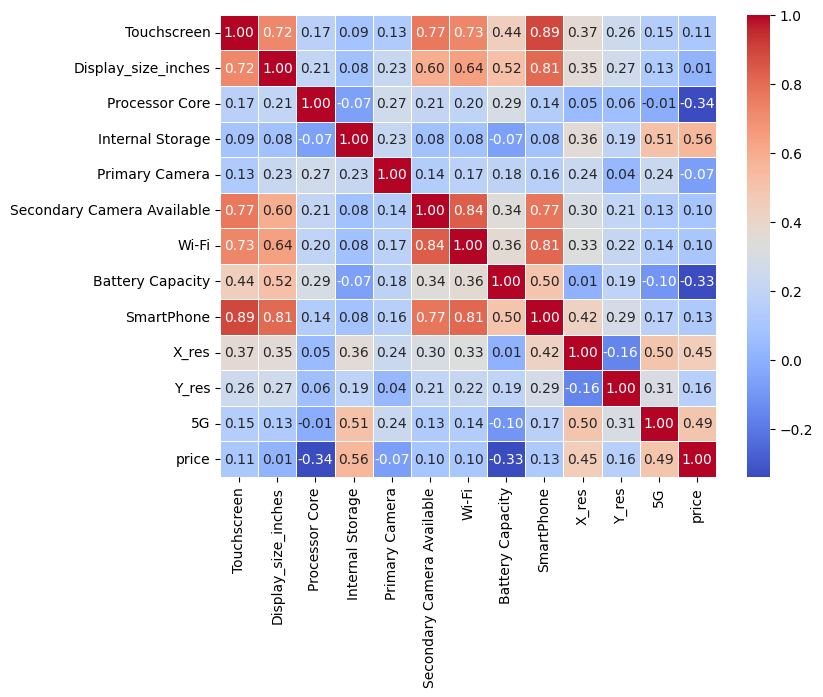

In [153]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_columns.corr(),annot=True,cmap='coolwarm',fmt=".2f", linewidths=0.5)

In [105]:
df.to_csv("Cleaned_Mobile_data.csv")

In [106]:
df.drop_duplicates(inplace=True)

In [107]:
report = pd.DataFrame(columns=['     Model         ','   R2_score(%)  ',' Mean absolute Error (%)',' Mean Square Error (%)'])

In [108]:
X = df.drop(columns=['price'])
y = df['price']

In [109]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [110]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [111]:
ohe = OneHotEncoder()
ohe.fit(X[['Brand','Color','Operating System','Processor']])

OneHotEncoder()

In [112]:
colums_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Brand','Color','Operating System','Processor']),remainder='passthrough')

In [113]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

## Linear Regression

In [114]:
lr = LinearRegression()
pipe = make_pipeline(colums_trans,lr)
pipe.fit(X_train,y_train)

print("=============Training r2==============")
y_train_pred = pipe.predict(X_train)
print(f"r2_score:-{r2_score(y_train,y_train_pred)}")
print(f"mean Absolute error:-{mean_absolute_error(y_train,y_train_pred)}")
print(f"mean Squared error:-{mean_squared_error(y_train,y_train_pred)}")

print("=============Testing r2==============")
y_pred = pipe.predict(X_test)
print(f"r2_score:-{r2_score(y_test,y_pred)}")
print(f"mean Absolute error:-{mean_absolute_error(y_test,y_pred)}")
print(f"mean Squared error:-{mean_squared_error(y_test,y_pred)}")

=============Training r2==============
r2_score:-0.8390068755152791
mean Absolute error:-7934.946188257726
mean Squared error:-131451452.19063763
=============Testing r2==============
r2_score:-0.8136984687157144
mean Absolute error:-10596.410307871001
mean Squared error:-319063712.67016304


In [115]:
report.loc['1'] = ['Linear Model',r2_score(y_test,y_pred)*100,mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred)]

## Lasso

In [116]:
reg = [0.1,0.01,0.001,0.0001,1]
score = []
mae = []
mse = []
for x in reg:
    ls = Lasso(alpha=x)
    pipe = make_pipeline(colums_trans,ls)
    pipe.fit(X_train,y_train)

    print("At alpha: ",x)
    print("=============Training r2==============")
    y_train_pred = pipe.predict(X_train)
    print(f"r2_score:-{r2_score(y_train,y_train_pred)}")
    print(f"mean Absolute error:-{mean_absolute_error(y_train,y_train_pred)}")
    print(f"mean Squared error:-{mean_squared_error(y_train,y_train_pred)}")
    
    print("=============Testing r2==============")
    y_pred = pipe.predict(X_test)
    print(f"r2_score:-{r2_score(y_test,y_pred)}")
    print(f"mean Absolute error:-{mean_absolute_error(y_test,y_pred)}")
    print(f"mean Squared error:-{mean_squared_error(y_test,y_pred)}")
    
    score.append(r2_score(y_test,y_pred))
    mae.append(mean_absolute_error(y_test,y_pred))
    mse.append(mean_squared_error(y_test,y_pred))
    print("=============================================================")
    print("=============================================================")

ind_mx = np.argmax(score)
print("The  alpha where maximum score: ",reg[ind_mx])
print("The  max r2 score: ",np.max(score))

At alpha:  0.1
=============Training r2==============
r2_score:-0.8390068306447278
mean Absolute error:-7934.55869009165
mean Squared error:-131451488.82760052
=============Testing r2==============
r2_score:-0.8158244198692353
mean Absolute error:-10476.257990245893
mean Squared error:-315422766.3863522
At alpha:  0.01
=============Training r2==============
r2_score:-0.8390068750719732
mean Absolute error:-7934.918682965015
mean Squared error:-131451452.55259836
=============Testing r2==============
r2_score:-0.8158047799229368
mean Absolute error:-10476.065901669823
mean Squared error:-315456402.14951235
At alpha:  0.001
=============Training r2==============
r2_score:-0.8390068755108979
mean Absolute error:-7934.943804483835
mean Squared error:-131451452.19421484
=============Testing r2==============
r2_score:-0.8158028408743887
mean Absolute error:-10476.010805478383
mean Squared error:-315459723.00267196
At alpha:  0.0001
=============Training r2==============
r2_score:-0.839006875

In [117]:
report.loc['2'] = ['Lasso',np.max(score)*100,np.max(mae),np.max(mse)]

## Ridge

In [118]:
reg = [0.1,0.01,0.001,0.0001,1]
score = []
mae = []
mse = []
for x in reg:
    ls = Ridge(alpha=x)
    pipe = make_pipeline(colums_trans,ls)
    pipe.fit(X_train,y_train)

    print("At alpha: ",x)
    print("=============Training r2==============")
    y_train_pred = pipe.predict(X_train)
    print(f"r2_score:-{r2_score(y_train,y_train_pred)}")
    print(f"mean Absolute error:-{mean_absolute_error(y_train,y_train_pred)}")
    print(f"mean Squared error:-{mean_squared_error(y_train,y_train_pred)}")
    
    print("=============Testing r2==============")
    y_pred = pipe.predict(X_test)
    print(f"r2_score:-{r2_score(y_test,y_pred)}")
    print(f"mean Absolute error:-{mean_absolute_error(y_test,y_pred)}")
    print(f"mean Squared error:-{mean_squared_error(y_test,y_pred)}")
    
    score.append(r2_score(y_test,y_pred))
    mae.append(mean_absolute_error(y_test,y_pred))
    mse.append(mean_squared_error(y_test,y_pred))
    print("=============================================================")
    print("=============================================================")

ind_mx = np.argmax(score)
print("The  alpha where maximum score: ",reg[ind_mx])
print("The  max r2 score: ",np.max(score))

At alpha:  0.1
=============Training r2==============
r2_score:-0.8389282629922972
mean Absolute error:-7917.695855120948
mean Squared error:-131515639.59205246
=============Testing r2==============
r2_score:-0.8137112262587287
mean Absolute error:-10532.296688918344
mean Squared error:-319041863.84793043
At alpha:  0.01
=============Training r2==============
r2_score:-0.8390058866724219
mean Absolute error:-7933.102434257581
mean Squared error:-131452259.58430722
=============Testing r2==============
r2_score:-0.8137066587810091
mean Absolute error:-10589.397701656693
mean Squared error:-319049686.2012343
At alpha:  0.001
=============Training r2==============
r2_score:-0.8390068653749267
mean Absolute error:-7934.760469262827
mean Squared error:-131451460.47027096
=============Testing r2==============
r2_score:-0.8136993875710714
mean Absolute error:-10595.702184113241
mean Squared error:-319062139.02017975
At alpha:  0.0001
=============Training r2==============
r2_score:-0.83900687

In [119]:
report.loc['3'] = ['Ridge',np.max(score)*100,np.max(mae),np.max(mse)]

## Decision Tree
### Grid Search CV

In [120]:
X_numeric = X_train.select_dtypes(include='number')
print(len(X_numeric),len(X_train))

360 360


In [121]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_numeric, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [122]:
print(best_model)

DecisionTreeRegressor(max_depth=7, max_features='sqrt', min_samples_split=5)


In [123]:
DT = DecisionTreeRegressor(max_depth=7,max_features='sqrt',min_samples_leaf=4,min_samples_split=10)
pipe = make_pipeline(colums_trans,DT)
pipe.fit(X_train,y_train)

print("=============Training r2==============")
y_train_pred = pipe.predict(X_train)
print(f"r2_score:-{r2_score(y_train,y_train_pred)}")
print(f"mean Absolute error:-{mean_absolute_error(y_train,y_train_pred)}")
print(f"mean Squared error:-{mean_squared_error(y_train,y_train_pred)}")

print("=============Testing r2==============")
y_pred = pipe.predict(X_test)
print(f"r2_score:-{r2_score(y_test,y_pred)}")
print(f"mean Absolute error:-{mean_absolute_error(y_test,y_pred)}")
print(f"mean Squared error:-{mean_squared_error(y_test,y_pred)}")

=============Training r2==============
r2_score:-0.8714491070120248
mean Absolute error:-5853.472654231713
mean Squared error:-104962256.10725579
=============Testing r2==============
r2_score:-0.8217827756388435
mean Absolute error:-8437.37974826172
mean Squared error:-305218367.6347396


In [124]:
report.loc['4'] = ['Decision Tree',r2_score(y_test,y_pred)*100,mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred)]

## Extra Trees

In [125]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

grid_search = GridSearchCV(ExtraTreesRegressor(), param_grid, cv=5)
grid_search.fit(X_numeric, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [126]:
print(best_model)

ExtraTreesRegressor(max_features='log2', min_samples_split=5, n_estimators=50)


In [127]:
ET = ExtraTreesRegressor(max_features='log2', min_samples_split=5, n_estimators=200)
pipe = make_pipeline(colums_trans,ET)

pipe.fit(X_train,y_train)

print("=============Training r2==============")
y_train_pred = pipe.predict(X_train)
print(f"r2_score:-{r2_score(y_train,y_train_pred)}")
print(f"mean Absolute error:-{mean_absolute_error(y_train,y_train_pred)}")
print(f"mean Squared error:-{mean_squared_error(y_train,y_train_pred)}")

print("=============Testing r2==============")
y_pred = pipe.predict(X_test)
print(f"r2_score:-{r2_score(y_test,y_pred)}")
print(f"mean Absolute error:-{mean_absolute_error(y_test,y_pred)}")
print(f"mean Squared error:-{mean_squared_error(y_test,y_pred)}")


=============Training r2==============
r2_score:-0.9825858920308642
mean Absolute error:-1799.979476851853
mean Squared error:-14218680.384482553
=============Testing r2==============
r2_score:-0.8998952170030975
mean Absolute error:-5335.815854629636
mean Squared error:-171441444.94601277


In [128]:
report.loc['5'] = ['Extra Tree',r2_score(y_test,y_pred)*100,mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred)]

## Random Forest

In [129]:


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_numeric, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [130]:
print(best_model)

RandomForestRegressor(bootstrap=False, max_depth=10, max_features='log2',
                      min_samples_split=5, n_estimators=50)


In [131]:
ET = RandomForestRegressor(max_features='sqrt')
pipe = make_pipeline(colums_trans,ET)

pipe.fit(X_train,y_train)

print("=============Training r2==============")
y_train_pred = pipe.predict(X_train)
print(f"r2_score:-{r2_score(y_train,y_train_pred)}")
print(f"mean Absolute error:-{mean_absolute_error(y_train,y_train_pred)}")
print(f"mean Squared error:-{mean_squared_error(y_train,y_train_pred)}")

print("=============Testing r2==============")
y_pred = pipe.predict(X_test)
print(f"r2_score:-{r2_score(y_test,y_pred)}")
print(f"mean Absolute error:-{mean_absolute_error(y_test,y_pred)}")
print(f"mean Squared error:-{mean_squared_error(y_test,y_pred)}")

=============Training r2==============
r2_score:-0.9860961487615529
mean Absolute error:-1568.9440833771937
mean Squared error:-11352543.42187714
=============Testing r2==============
r2_score:-0.8941089863089446
mean Absolute error:-5384.770325594158
mean Squared error:-181351058.8655318


In [132]:
report.loc['6'] = ['Random Forest',r2_score(y_test,y_pred)*100,mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred)]

## KNN

In [133]:
nebour = [2,3,4,5,7]
score = []
mae = []
mse = []
for x in nebour:
    KNN = KNeighborsRegressor(n_neighbors=x)
    pipe = make_pipeline(colums_trans,KNN)
    pipe.fit(X_train,y_train)

    print("At: ",x)
    print("=============Training r2==============")
    y_train_pred = pipe.predict(X_train)
    print(f"r2_score:-{r2_score(y_train,y_train_pred)}")
    print(f"mean Absolute error:-{mean_absolute_error(y_train,y_train_pred)}")
    print(f"mean Squared error:-{mean_squared_error(y_train,y_train_pred)}")

    print("=============Testing r2==============")
    y_pred = pipe.predict(X_test)
    print(f"r2_score:-{r2_score(y_test,y_pred)}")
    print(f"mean Absolute error:-{mean_absolute_error(y_test,y_pred)}")
    print(f"mean Squared error:-{mean_squared_error(y_test,y_pred)}")

    score.append(r2_score(y_test,y_pred))
    mae.append(mean_absolute_error(y_test,y_pred))
    mse.append(mean_squared_error(y_test,y_pred))
    print("=============================================================")
    print("=============================================================")

ind_mx = np.argmax(score)
print("The  Neighours where maximum score: ",nebour[ind_mx])
print("The  max r2 score: ",np.max(score))

At:  2
=============Training r2==============


r2_score:-0.9064451198013382
mean Absolute error:-3426.55
mean Squared error:-76387888.61944444
=============Testing r2==============
r2_score:-0.7053666396497598
mean Absolute error:-10852.011111111111
mean Squared error:-504594960.5555556
At:  3
=============Training r2==============
r2_score:-0.8741424002276108
mean Absolute error:-4196.055555555556
mean Squared error:-102763172.72716047
=============Testing r2==============
r2_score:-0.6902283889387921
mean Absolute error:-10695.581481481482
mean Squared error:-530521030.2012346
At:  4
=============Training r2==============
r2_score:-0.8338471217119274
mean Absolute error:-4987.047916666666
mean Squared error:-135664409.3126736
=============Testing r2==============
r2_score:-0.6402291536187783
mean Absolute error:-11651.31111111111
mean Squared error:-616150716.3444444
At:  5
=============Training r2==============
r2_score:-0.7963822001871039
mean Absolute error:-5799.225
mean Squared error:-166254649.46366665
=============Testing 

In [134]:
report.loc['7'] = ['KNN',np.max(score)*100,np.max(mae),np.max(mse)]

## SVM Model

In [135]:

param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]}
grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(X_numeric, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [136]:
print(best_model)

SVR(C=10, kernel='linear')


In [137]:
SVM = SVR(C=10,kernel='linear')
pipe = make_pipeline(colums_trans,SVM)
pipe.fit(X_train,y_train)

print("=============Training r2==============")
y_train_pred = pipe.predict(X_train)
print(f"r2_score:-{r2_score(y_train,y_train_pred)}")
print(f"mean Absolute error:-{mean_absolute_error(y_train,y_train_pred)}")
print(f"mean Squared error:-{mean_squared_error(y_train,y_train_pred)}")

print("=============Testing r2==============")
y_pred = pipe.predict(X_test)
print(f"r2_score:-{r2_score(y_test,y_pred)}")
print(f"mean Absolute error:-{mean_absolute_error(y_test,y_pred)}")
print(f"mean Squared error:-{mean_squared_error(y_test,y_pred)}")


=============Training r2==============
r2_score:-0.5193998641121051
mean Absolute error:-10532.302021053734
mean Squared error:-392411700.73369956
=============Testing r2==============
r2_score:-0.527551798839109
mean Absolute error:-15796.350329467416
mean Squared error:-809124198.1082355


In [138]:
report.loc['8'] = ['SVM',r2_score(y_test,y_pred)*100,mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred)]

In [139]:
report.sort_values(by='   R2_score(%)  ',ascending=False)

,Model,R2_score(%),Mean absolute Error (%),Mean Square Error (%)
5,Extra Tree,89.989522,5335.815855,1.714414e+08
6,Random Forest,89.410899,5384.770326,1.813511e+08
4,Decision Tree,82.178278,8437.379748,3.052184e+08
2,Lasso,81.594101,10477.973071,3.154601e+08
3,Ridge,81.371123,10596.339426,3.200946e+08
1,Linear Model,81.369847,10596.410308,3.190637e+08
7,KNN,70.536664,12371.577778,7.011244e+08
8,SVM,52.755180,15796.350329,8.091242e+08


### Certainly! It appears that, based on the observed results, Random Forest and Extra Trees models are providing the best R-squared scores for this dataset. Therefore, the decision has been made to use the Random Forest model as the final model for making predictions on this dataset.

In [140]:
df = pd.read_csv('Cleaned_Mobile_data.csv')

In [141]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [142]:
pipe.predict(pd.DataFrame([['APPLE','Blue','1','6.10','Ios',6,'128.0','12.0','1','1','3240','1','2532','1170','Qualcomm','1']],columns=['Brand','Color','Touchscreen','Display_size_inches','Operating System','Processor Core','Internal Storage','Primary Camera','Secondary Camera Available','Wi-Fi','Battery Capacity','SmartPhone','X_res','Y_res','Processor','5G']))[0]

47660.970987144254

In [143]:
report

,Model,R2_score(%),Mean absolute Error (%),Mean Square Error (%)
1,Linear Model,81.369847,10596.410308,3.190637e+08
2,Lasso,81.594101,10477.973071,3.154601e+08
3,Ridge,81.371123,10596.339426,3.200946e+08
4,Decision Tree,82.178278,8437.379748,3.052184e+08
5,Extra Tree,89.989522,5335.815855,1.714414e+08
6,Random Forest,89.410899,5384.770326,1.813511e+08
7,KNN,70.536664,12371.577778,7.011244e+08
8,SVM,52.755180,15796.350329,8.091242e+08


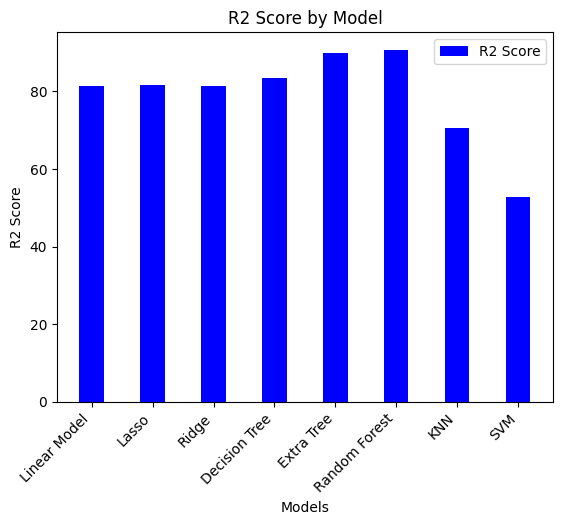

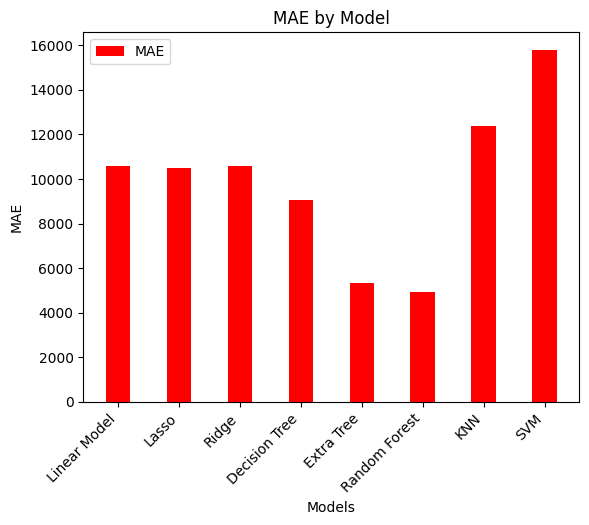

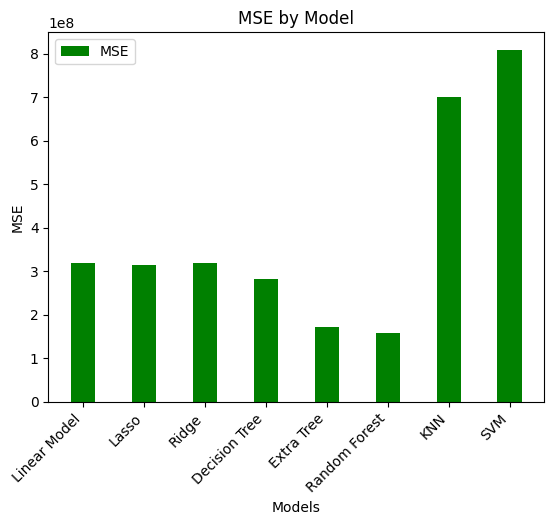

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
models = ['Linear Model', 'Lasso', 'Ridge', 'Decision Tree', 'Extra Tree', 'Random Forest', 'KNN', 'SVM']
r2_scores = [81.369847, 81.594101, 81.371123, 83.514462, 90.003086, 90.706987, 70.536664, 52.755180]
maes = [10596.410308, 10477.973071, 10596.339426, 9065.846308, 5347.040691, 4929.755201, 12371.577778, 15796.350329]
mses = [3.190637e+08, 3.154601e+08, 3.200946e+08, 2.823346e+08, 1.712091e+08, 1.591540e+08, 7.011244e+08, 8.091242e+08]

# Set the width of the bars
bar_width = 0.4

# Set the positions of bars on X-axis
index = np.arange(len(models))

# Plotting the bar plots for R2 Score
plt.bar(index, r2_scores, width=bar_width, label='R2 Score', color='blue')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Score by Model')
plt.xticks(index, models, rotation=45, ha='right')  # Rotate x-axis labels
plt.legend()
plt.show()

# Plotting the bar plots for MAE
plt.bar(index, maes, width=bar_width, label='MAE', color='red')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('MAE by Model')
plt.xticks(index, models, rotation=45, ha='right')  # Rotate x-axis labels
plt.legend()
plt.show()

# Plotting the bar plots for MSE
plt.bar(index, mses, width=bar_width, label='MSE', color='green')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE by Model')
plt.xticks(index, models, rotation=45, ha='right')  # Rotate x-axis labels
plt.legend()
plt.show()
